In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Class1'

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, load_img
import os
import glob
import imageio.v3 as iio
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, load_img
import os

In [ ]:
def load_file(file_path, label):
    file_path =file_path

    folder_name = file_path.split("/")[-1]

    out_list = []

    # Load every file .png format
    for image_path in glob.glob(file_path + "/*.PNG"):
        # Read image file
        image = iio.imread(image_path)

        # Declare temporary dict dtype
        temp = {}

        # Set the file name
        temp["name"] = image_path.split("/")[-1]

        # Set the file label, 0 for non defect. 1 for defect
        temp["label"] = label
        # There are somes images are tensor dtype
        # Thus I fix by selecting only a tensor index zero
        try:
            temp["data"] = image[:,:,0].astype("int")
        except:
            # Normal case
            temp["data"] = image.astype("int")

        # Append temp into output list
        out_list.append(temp)

    # Print process status by checking size of output list
    if len(out_list) == 0:
        print("loading files from folder: {} is   failed".format(folder_name))
    else:
        print("loading file from folder: {} is successful".format(folder_name))

    # Convert list into numpy array dtype
    return np.array(out_list)

In [ ]:
defect_images_path = data_path + '/defect'
non_defect_images_path = data_path + '/non-defect'

defect_images = load_file(defect_images_path, 1)
non_defect_images = load_file(non_defect_images_path, 0)

loading file from folder: defect is successful
loading file from folder: non-defect is successful


In [ ]:
import tensorflow as tf
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import StratifiedKFold

# Function to load images from a directory and label them
def load_file(image_dir, label, image_size=(512, 512)):
    images = []
    for filename in os.listdir(image_dir):
        # Load the image in grayscale mode
        img = load_img(os.path.join(image_dir, filename), color_mode='grayscale', target_size=image_size)
        img_array = img_to_array(img)
        images.append({'data': img_array, 'label': label})
    return np.array(images)

# Load defect and non-defect images
defect_images_path = data_path + '/defect'
non_defect_images_path = data_path + '/non-defect'

defect_images = load_file(defect_images_path, 1)
non_defect_images = load_file(non_defect_images_path, 0)

# Shuffle the images
np.random.shuffle(defect_images)
np.random.shuffle(non_defect_images)

# Balance the classes
#class_size = min(defect_images.shape[0], non_defect_images.shape[0])

# Combine the balanced datasets
dataset = np.concatenate((defect_images, non_defect_images))

# Create an empty matrix X and vector y
X = np.empty([dataset.shape[0], 512, 512, 1]).astype(np.float32)
y = np.empty(dataset.shape[0]).astype(np.int32)

# Assign the data to X and y
for i in range(dataset.shape[0]):
    X[i] = dataset[i]['data']
    y[i] = dataset[i]['label']

# Convert X to a TensorFlow tensor
X = tf.convert_to_tensor(X)

# Convert grayscale images to RGB and resize to (224, 224)
X_rgb = tf.image.grayscale_to_rgb(X)
X_rgb = tf.image.resize(X_rgb, [224, 224])

# Convert back to numpy array for indexing
X_rgb = X_rgb.numpy()

# Display size of the labels
print(np.unique(y, return_counts=True))

<ipython-input-6-6aa40592db59>:36: RuntimeWarning: invalid value encountered in cast
  y = np.empty(dataset.shape[0]).astype(np.int32)


(array([0, 1], dtype=int32), array([1068,  150]))


In [ ]:
import tensorflow as tf

def create_vgg16_model(image_shape=(224, 224, 3), print_summary=False):
    model = tf.keras.models.Sequential()

    # Block 1
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=image_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))  # Dropout layer added

    # Block 2
    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))  # Dropout layer added

    # Block 3
    model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))  # Dropout layer added

    # Block 4
    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))  # Dropout layer added

    # Block 5
    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))  # Dropout layer added

    model.add(tf.keras.layers.Flatten())

    # Fully connected layers
    model.add(tf.keras.layers.Dense(4096))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(4096))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.5))

    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Set model compiler
    model.compile(optimizer="SGD", loss="binary_crossentropy", metrics=["accuracy"])

    # Show the CNN model detail
    if print_summary:
        model.summary()

    return model


In [ ]:
kfold_splits = 4
n_epoch = 5
batch_size = 10
skf = StratifiedKFold(n_splits=kfold_splits, shuffle=True)

for fold, (train_indices, val_indices) in enumerate(skf.split(X_rgb, y)):
    print(f'Training on fold {fold+1}/{kfold_splits}...')

    # Get the train and validation data for the current fold
    xtrain, xval = X_rgb[train_indices], X_rgb[val_indices]
    ytrain, yval = y[train_indices], y[val_indices]

    # Print number of samples per class in the current fold
    print(f'ytrain: number of samples each class: {np.unique(ytrain, return_counts=True)}')
    print(f'yval: number of samples each class: {np.unique(yval, return_counts=True)}')

    # Create a new model instance
    model = create_vgg16_model()

    print(f'Training new iteration on {xtrain.shape[0]} training samples, {xval.shape[0]} validation samples, this may take a while...')

    # Train the model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(f'vgg16_model_fold_{fold+1}.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(
        xtrain, ytrain,
        epochs=n_epoch,
        batch_size=batch_size,
        validation_data=(xval, yval),
        callbacks=[early_stopping, model_checkpoint]
    )

    print('— ' * 20)

Training on fold 1/4...
ytrain: number of samples each class: (array([0, 1], dtype=int32), array([801, 112]))
yval: number of samples each class: (array([0, 1], dtype=int32), array([267,  38]))
Training new iteration on 913 training samples, 305 validation samples, this may take a while...
Epoch 1/5
92/92 [==============================] - ETA: 0s - loss: 0.5496 - accuracy: 0.8193

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 36s 215ms/step - loss: 0.5496 - accuracy: 0.8193 - val_loss: 1.8461 - val_accuracy: 0.8754
Epoch 2/5
92/92 [==============================] - 13s 141ms/step - loss: 0.5104 - accuracy: 0.8412 - val_loss: 17.5937 - val_accuracy: 0.1246
Epoch 3/5
92/92 [==============================] - 15s 164ms/step - loss: 0.4814 - accuracy: 0.8434 - val_loss: 1.5123 - val_accuracy: 0.5443
Epoch 4/5
92/92 [==============================] - 15s 163ms/step - loss: 0.5358 - accuracy: 0.8269 - val_loss: 0.9361 - val_accuracy: 0.4098
Epoch 5/5
92/92 [==============================] - 15s 163ms/step - loss: 0.5374 - accuracy: 0.8456 - val_loss: 0.6360 - val_accuracy: 0.8557
— — — — — — — — — — — — — — — — — — — — 
Training on fold 2/4...
ytrain: number of samples each class: (array([0, 1], dtype=int32), array([801, 112]))
yval: number of samples each class: (array([0, 1], dtype=int32), array([267,  38]))
Training new iteration on 913 training samples, 305 validation s

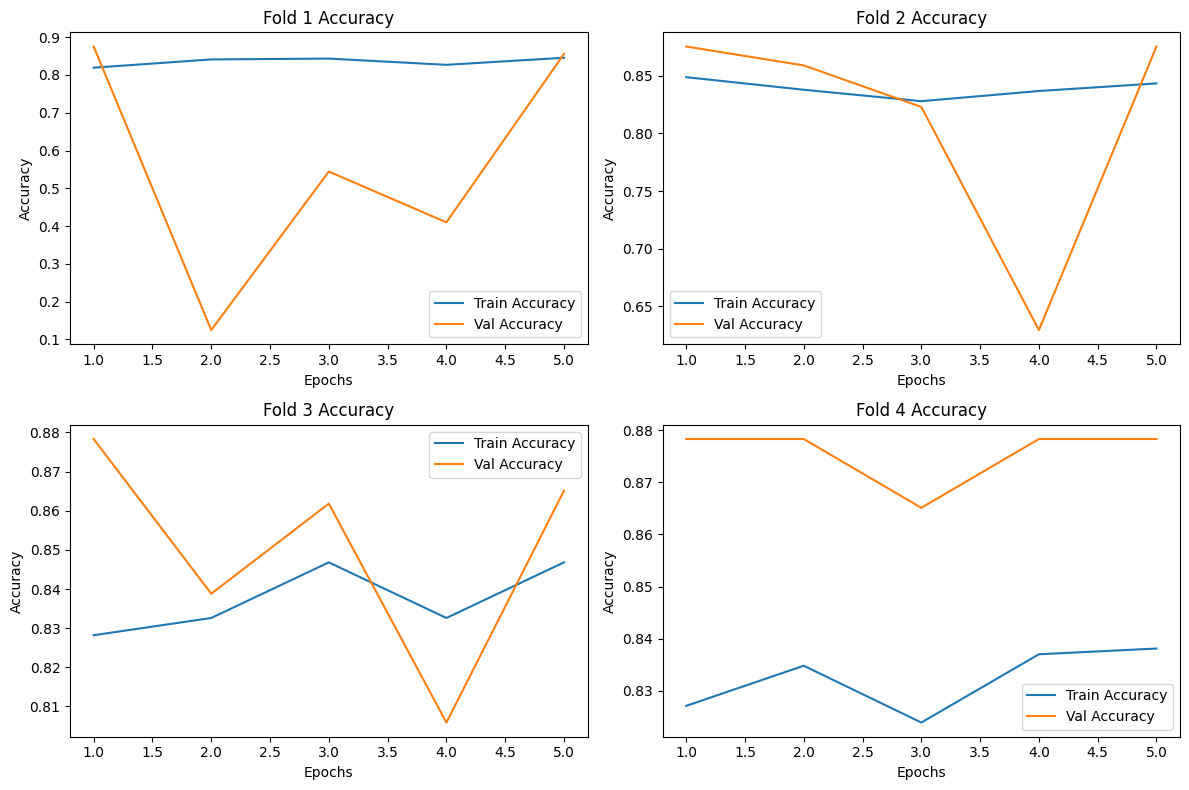

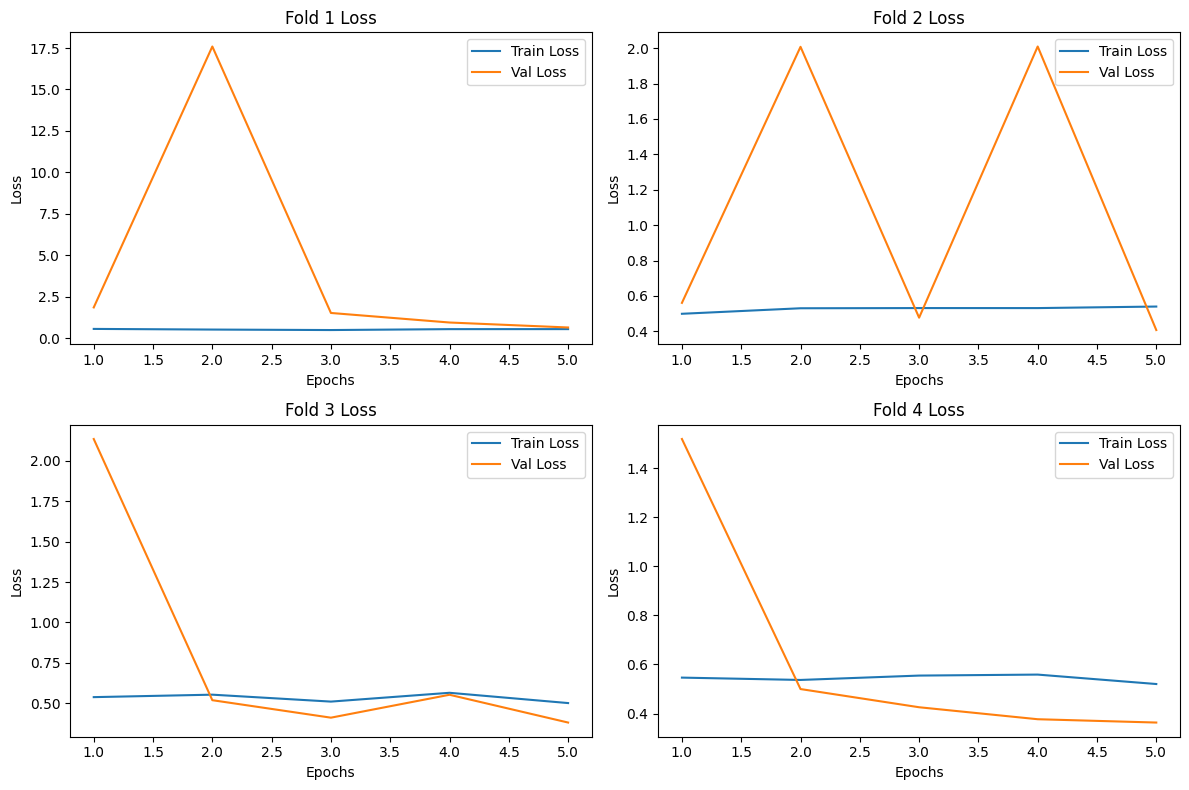

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Function to create epochs
def create_epoch(n=0):
    return np.arange(0, n) + 1

# Model evaluation results for each fold
fold1_epoch = create_epoch(n=5)
fold1_loss = np.array([0.5496, 0.5104, 0.4814, 0.5358, 0.5374])
fold1_acc = np.array([0.8193, 0.8412, 0.8434, 0.8269, 0.8456])
fold1_val_loss = np.array([1.8461, 17.5937, 1.5123, 0.9361, 0.6360])
fold1_val_acc = np.array([0.8754, 0.1246, 0.5443, 0.4098, 0.8557])

fold2_epoch = create_epoch(n=5)
fold2_loss = np.array([0.4991, 0.5303, 0.5314, 0.5313, 0.5400])
fold2_acc = np.array([0.8488, 0.8379, 0.8280, 0.8368, 0.8434])
fold2_val_loss = np.array([0.5608, 2.0080, 0.4771, 2.0097, 0.4072])
fold2_val_acc = np.array([0.8754, 0.8590, 0.8230, 0.6295, 0.8754])

fold3_epoch = create_epoch(n=5)
fold3_loss = np.array([0.5389, 0.5541, 0.5113, 0.5657, 0.5022])
fold3_acc = np.array([0.8282, 0.8326, 0.8468, 0.8326, 0.8468])
fold3_val_loss = np.array([2.1335, 0.5200, 0.4120, 0.5535, 0.3819])
fold3_val_acc = np.array([0.8783, 0.8388, 0.8618, 0.8059, 0.8651])

fold4_epoch = create_epoch(n=5)
fold4_loss = np.array([0.5463, 0.5368, 0.5546, 0.5586, 0.5202])
fold4_acc = np.array([0.8271, 0.8348, 0.8239, 0.8370, 0.8381])
fold4_val_loss = np.array([1.5181, 0.4997, 0.4256, 0.3768, 0.3633])
fold4_val_acc = np.array([0.8783, 0.8783, 0.8651, 0.8783, 0.8783])

# Plot training and validation accuracy for each fold
plt.figure(figsize=(12, 8))

# Fold 1
plt.subplot(2, 2, 1)
plt.plot(fold1_epoch, fold1_acc, label='Train Accuracy')
plt.plot(fold1_epoch, fold1_val_acc, label='Val Accuracy')
plt.title('Fold 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Fold 2
plt.subplot(2, 2, 2)
plt.plot(fold2_epoch, fold2_acc, label='Train Accuracy')
plt.plot(fold2_epoch, fold2_val_acc, label='Val Accuracy')
plt.title('Fold 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Fold 3
plt.subplot(2, 2, 3)
plt.plot(fold3_epoch, fold3_acc, label='Train Accuracy')
plt.plot(fold3_epoch, fold3_val_acc, label='Val Accuracy')
plt.title('Fold 3 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Fold 4
plt.subplot(2, 2, 4)
plt.plot(fold4_epoch, fold4_acc, label='Train Accuracy')
plt.plot(fold4_epoch, fold4_val_acc, label='Val Accuracy')
plt.title('Fold 4 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot training and validation loss for each fold
plt.figure(figsize=(12, 8))

# Fold 1
plt.subplot(2, 2, 1)
plt.plot(fold1_epoch, fold1_loss, label='Train Loss')
plt.plot(fold1_epoch, fold1_val_loss, label='Val Loss')
plt.title('Fold 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Fold 2
plt.subplot(2, 2, 2)
plt.plot(fold2_epoch, fold2_loss, label='Train Loss')
plt.plot(fold2_epoch, fold2_val_loss, label='Val Loss')
plt.title('Fold 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Fold 3
plt.subplot(2, 2, 3)
plt.plot(fold3_epoch, fold3_loss, label='Train Loss')
plt.plot(fold3_epoch, fold3_val_loss, label='Val Loss')
plt.title('Fold 3 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Fold 4
plt.subplot(2, 2, 4)
plt.plot(fold4_epoch, fold4_loss, label='Train Loss')
plt.plot(fold4_epoch, fold4_val_loss, label='Val Loss')
plt.title('Fold 4 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
val_acc_avg = np.mean([np.mean(fold1_val_acc), np.mean(fold2_val_acc), np.mean(fold3_val_acc), np.mean(fold4_val_acc)])
val_loss_avg = np.mean([np.mean(fold1_val_loss), np.mean(fold2_val_loss), np.mean(fold3_val_loss), np.mean(fold4_val_loss)])

print("Validation Accuracy Average:", val_acc_avg)
print("Validation Loss Average:", val_loss_avg)

Validation Accuracy Average: 0.775015
Validation Loss Average: 1.75857
